In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define dataset paths
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
val_dir = '/content/drive/MyDrive/dataset/vaildation'

In [ ]:
# Image data generators for train, test, validation
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [ ]:
# Define the CNN model
model = Sequential()

# Feature extraction layers (conv + pooling)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary (Feature extraction)
print("Model Summary (Feature Extraction):")
model.summary()

Model Summary (Feature Extraction):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fix steps_per_epoch and validation_steps
steps_per_epoch_train = train_generator.samples // batch_size
steps_per_epoch_val = val_generator.samples // batch_size

epochs = 20
# Train the model with corrected steps_per_epoch and validation_steps
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=steps_per_epoch_val
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 91s 11s/step - accuracy: 0.5140 - loss: 0.8335 - val_accuracy: 0.7589 - val_loss: 0.5585
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6875 - loss: 0.5844

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 913ms/step - accuracy: 0.6875 - loss: 0.5844 - val_accuracy: 0.7931 - val_loss: 0.5206
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.7819 - loss: 0.5335 - val_accuracy: 0.7634 - val_loss: 0.5159
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.8125 - loss: 0.4812 - val_accuracy: 0.8276 - val_loss: 0.4171
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7853 - loss: 0.4659 - val_accuracy: 0.8259 - val_loss: 0.4329
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7812 - loss: 0.5142 - val_accuracy: 0.7586 - val_loss: 0.4394
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8183 - loss: 0.4391 - val_accuracy: 0.8125 - val_loss: 0.4142
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8438 - loss: 0.3392 - val_accuracy: 0.8966 - val_loss: 0.3333
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8187 - loss: 0.4117 - val_accuracy: 0.8304 - val_loss: 0.3470
Epoch 10/20


In [ ]:
# Evaluate the model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")


Evaluating model on test data...
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.9843 - loss: 0.0716
Test Accuracy: 0.9842


In [ ]:
# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 692ms/step


In [ ]:
# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

In [ ]:
# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[ 96   2]
 [  2 153]]

Accuracy: 0.9842
Precision: 0.9871
Recall: 0.9871
F1 Score: 0.9871


In [21]:
from tabulate import tabulate

# Define the evaluation metrics
metrics = [
    ["Accuracy", f"{acc:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]

# Draw the table
print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="fancy_grid"))


╒═══════════╤═════════╕
│ Metric    │   Score │
╞═══════════╪═════════╡
│ Accuracy  │  0.9842 │
├───────────┼─────────┤
│ Precision │  0.9871 │
├───────────┼─────────┤
│ Recall    │  0.9871 │
├───────────┼─────────┤
│ F1 Score  │  0.9871 │
╘═══════════╧═════════╛


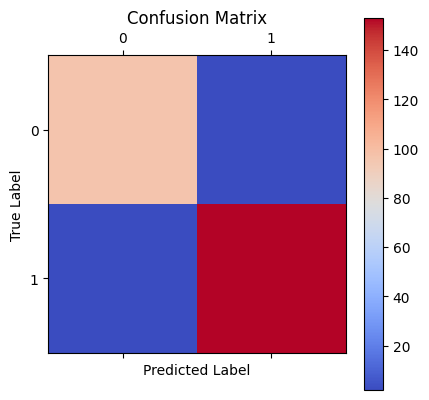

In [ ]:
# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

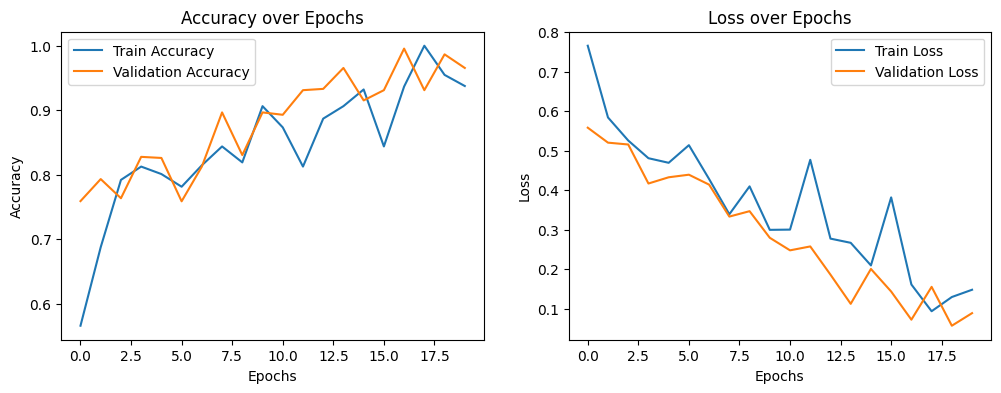

In [ ]:
# Accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


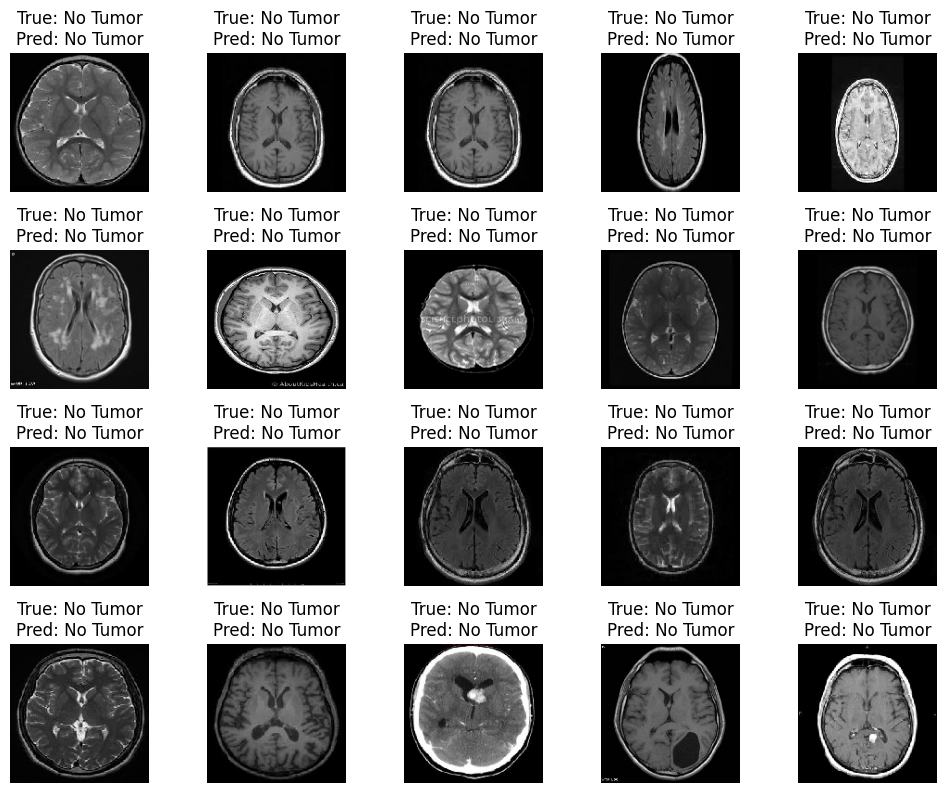

In [ ]:
import math

# Function to display images with predicted labels in a grid
def plot_images_with_predictions(generator, model, num_images=20):
  sample_images, sample_labels = next(generator)
  sample_predictions = model.predict(sample_images)

  # Calculate grid size
  grid_size = math.ceil(math.sqrt(num_images))  # Calculate number of rows/columns

  plt.figure(figsize=(10, 10))
  for i in range(num_images):
    plt.subplot(grid_size, grid_size, i+1)  # Create subplots in a grid
    plt.imshow(sample_images[i])

    # Set true and predicted labels
    true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
    predicted_label = f'Tumor ({sample_predictions[i][1]:.2f})' if sample_predictions[i].shape[0] > 1 else 'No Tumor'

    # Add titles to each subplot
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')  # Turn off axis for better display

  plt.tight_layout()  # Adjust layout to avoid overlapping
  plt.show()

# Display sample images with predictions (can change num_images)
plot_images_with_predictions(test_generator, model, num_images=20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


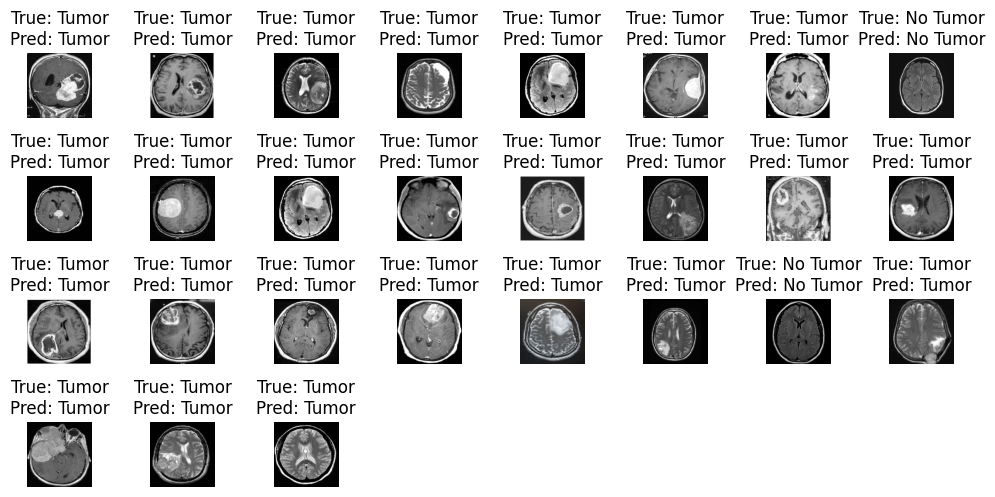

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Function to display images with predicted labels in a grid
def plot_images_with_predictions(generator, model, num_images=50):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Collect indices of both tumor and no_tumor
    tumor_indices = np.where(sample_labels == 1)[0]
    no_tumor_indices = np.where(sample_labels == 0)[0]

    # Ensure we have a balanced number of each, adjust based on availability
    num_tumor = num_images // 2
    num_no_tumor = num_images - num_tumor

    # Sample the tumor and no_tumor indices
    selected_tumor_indices = np.random.choice(tumor_indices, min(num_tumor, len(tumor_indices)), replace=False)
    selected_no_tumor_indices = np.random.choice(no_tumor_indices, min(num_no_tumor, len(no_tumor_indices)), replace=False)

    # Concatenate and shuffle the selected indices
    selected_indices = np.concatenate([selected_tumor_indices, selected_no_tumor_indices])
    np.random.shuffle(selected_indices)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))

    plt.figure(figsize=(10, 10))
    for idx, i in enumerate(selected_indices[:num_images]):
        plt.subplot(grid_size, grid_size, idx + 1)  # Create subplots in a grid
        plt.imshow(sample_images[i])

        # Set true and predicted labels
        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        # Add titles to each subplot
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')  # Turn off axis for better display

    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

# Display sample images with predictions (can change num_images)
plot_images_with_predictions(test_generator, model, num_images=50)


MultiLayer CNN


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary (Feature Extraction):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 146, 146, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,221,601 (8.47 MB)

 Trainable params: 2,221,601 (8.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 167s 21s/step - accuracy: 0.6104 - loss: 0.7152 - val_accuracy: 0.6027 - val_loss: 0.6890
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5517 - loss: 0.6897

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5517 - loss: 0.6897 - val_accuracy: 0.6897 - val_loss: 0.6828
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.6232 - loss: 0.6799 - val_accuracy: 0.6071 - val_loss: 0.6646
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.6250 - loss: 0.6488 - val_accuracy: 0.6552 - val_loss: 0.6251
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.5968 - loss: 0.6463 - val_accuracy: 0.7411 - val_loss: 0.5540
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7812 - loss: 0.4601 - val_accuracy: 0.3793 - val_loss: 0.7731
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.7131 - loss: 0.5799 - val_accuracy: 0.7455 - val_loss: 0.5046
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8125 - loss: 0.4303 - val_accuracy: 0.6207 - val_loss: 0.6721
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.7395 - loss: 0.5268 - val_accuracy: 0.7857 - val_loss: 0.4909
Epoch 10/20
7/7

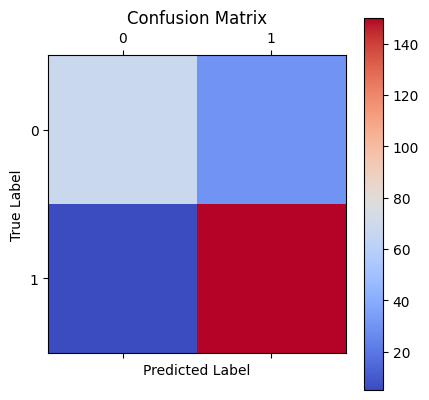

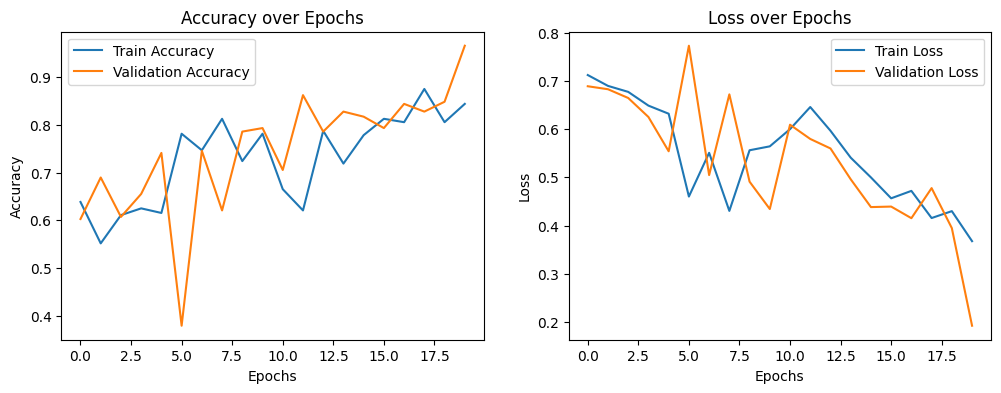

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


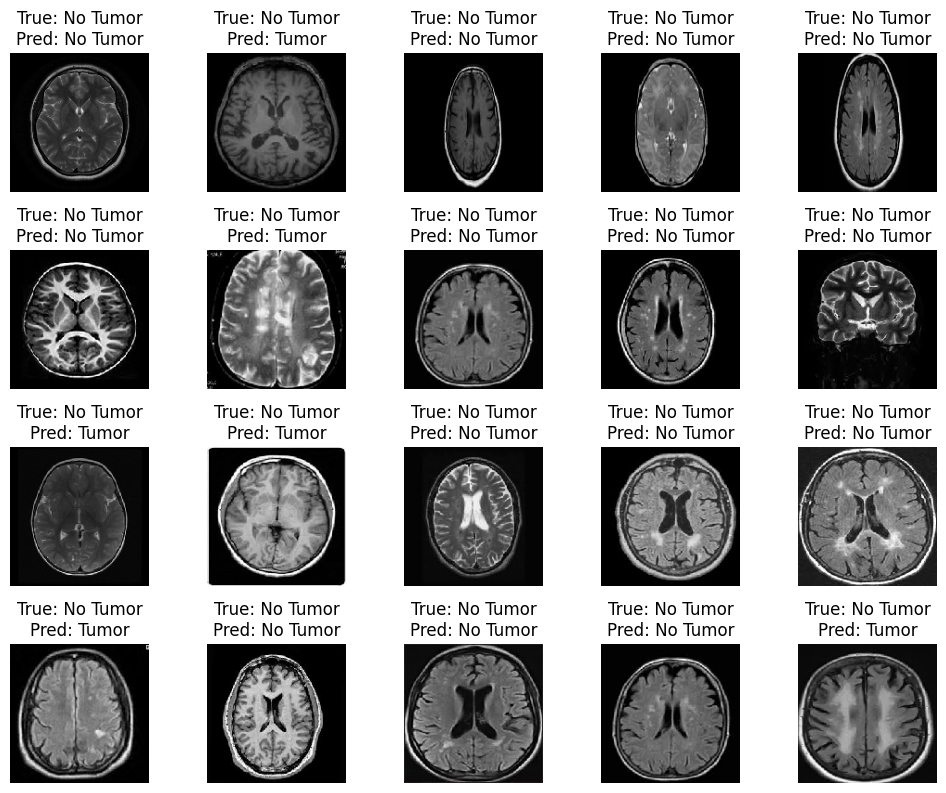

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
val_dir = '/content/drive/MyDrive/dataset/vaildation'

# Image data generators for train, test, validation
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # First convolution
    Conv2D(32, (3, 3), activation='relu'),  # Additional Conv2D before pooling
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),  # Second convolution block
    Conv2D(64, (3, 3), activation='relu'),  # Additional Conv2D before pooling
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'), # Third convolution block
    Conv2D(128, (3, 3), activation='relu'), # Additional Conv2D before pooling
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'), # Fourth convolution block
    Conv2D(128, (3, 3), activation='relu'), # Additional Conv2D before pooling
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Define the CNN model
#model = Sequential()

# Feature extraction layers (conv + pooling)
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Flatten())

# Fully connected layers
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary (Feature extraction)
print("Model Summary (Feature Extraction):")
model.summary()

# Fix steps_per_epoch and validation_steps
steps_per_epoch_train = train_generator.samples // batch_size
steps_per_epoch_val = val_generator.samples // batch_size

# Train the model with corrected steps_per_epoch and validation_steps
epochs = 20  # You can change this to your desired number of epochs

# Train the model with corrected steps_per_epoch and validation_steps
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=epochs, # Now 'epochs' is defined
    validation_data=val_generator,
    validation_steps=steps_per_epoch_val
)



# Evaluate the model on test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

from tabulate import tabulate

# Define the evaluation metrics
metrics = [
    ["Accuracy", f"{acc:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]

# Draw the table
print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="fancy_grid"))


# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

import math

# Function to display images with predicted labels in a grid
def plot_images_with_predictions(generator, model, num_images=20):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))  # Calculate number of rows/columns

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i+1)  # Create subplots in a grid
        plt.imshow(sample_images[i])

        # Set true and predicted labels
        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        # Add titles to each subplot
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')  # Turn off axis for better display

    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

# Display sample images with predictions (can change num_images)
plot_images_with_predictions(test_generator, model, num_images=20)

